# Comparing multiple BDT algorithms with TMVA

In this tutorial we will compare several algorithms with the [Toolkit for Multivariate Data Analysis with ROOT (TMVA)](http://root.cern/tmva) to classify events from particle collisions to determine whether they contain Higgs bosons.

We will skip the analysis of the input dataset (covered in another tutorial) and proceed to the comparison of several Boosted Decision Trees (BDT).

In [1]:
# Importing the ROOT module
import ROOT
# Importing the TMVA, TFile (to open ROOT files) and TCut (to filter data)
from ROOT import TMVA, TFile, TCut

# Initialising TMVA
TMVA.Tools.Instance()
TMVA.PyMethodBase.PyInitialize();

Welcome to JupyROOT 6.18/04


In [2]:
# This will overwrite the file at each execution
outputFile = TFile( "TMVA-Classification-Higgs-BDT-Comparison.root", "RECREATE" ) 
factory = TMVA.Factory( "TMVAClassification", outputFile,
                        "!V:Color:DrawProgressBar:Transformations=I;D;P;G,D:AnalysisType=Classification" )

# Opening the input data
inputFileName = "Higgs_data.root"
inputFile = TFile.Open( inputFileName )

# Retrieve input trees
sigTree = inputFile.Get("sig_tree")
bkgTree = inputFile.Get("bkg_tree")

#Instantiating the DataLoader
loader = TMVA.DataLoader("dataset")

# Global event weights per tree: useful to adjust the event weight to match a given luminosity
sigWeight = 1.0
bkgWeight = 1.0

# Note: one can add any number of trees (e.g. multiple backgrounds)
loader.AddSignalTree    ( sigTree, sigWeight )
loader.AddBackgroundTree( bkgTree, bkgWeight )

# Adding variables (here corresponding to the branches of the TTree)
loader.AddVariable("m_jj")
loader.AddVariable("m_jjj")
loader.AddVariable("m_lv")
loader.AddVariable("m_jlv")
loader.AddVariable("m_bb")
loader.AddVariable("m_wbb")
loader.AddVariable("m_wwbb")

# Apply additional cuts on the signal and background samples (can be different)
sigCut = TCut("")   ## for example: TCut sigCut = "m_jj>100"
bkgCut = TCut("")   ## for example: TCut bkgCut = "m_jj>100"


loader.PrepareTrainingAndTestTree( sigCut, bkgCut,
         "nTrain_Signal=7000:nTrain_Background=7000:SplitMode=Random:"
         "NormMode=NumEvents:!V" )


# Booking the BDT
factory.BookMethod(loader,ROOT.TMVA.Types.kBDT, "BDT",
          "!V:NTrees=200:MinNodeSize=2.5%:MaxDepth=2:BoostType=AdaBoost:AdaBoostBeta=0.5:UseBaggedBoost:"
          "BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20" )


# Booking another BDT. Note that the methog has a different name
factory.BookMethod(loader,ROOT.TMVA.Types.kBDT, "BDT2",
          "!V:NTrees=100:MinNodeSize=2.5%:MaxDepth=2:BoostType=AdaBoost:AdaBoostBeta=0.5:UseBaggedBoost:"
          "BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20" )

# Yet another BDT
factory.BookMethod(loader,ROOT.TMVA.Types.kBDT, "BDT3",
          "!V:NTrees=400:MinNodeSize=2.5%:MaxDepth=2:BoostType=AdaBoost:AdaBoostBeta=0.5:UseBaggedBoost:"
          "BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20" )

factory.TrainAllMethods()
factory.TestAllMethods()
factory.EvaluateAllMethods()


DataSetInfo              : [dataset] : Added class "Signal"
                         : Add Tree sig_tree of type Signal with 10000 events
DataSetInfo              : [dataset] : Added class "Background"
                         : Add Tree bkg_tree of type Background with 10000 events
Factory                  : Booking method: BDT
                         : 
DataSetFactory           : [dataset] : Number of events in input trees
                         : 
                         : 
                         : Number of training and testing events
                         : ---------------------------------------------------------------------------
                         : Signal     -- training events            : 7000
                         : Signal     -- testing events             : 3000
                         : Signal     -- training and testing events: 10000
                         : Background -- training events            : 7000
                         : Background -- test

0%, time left: unknown
7%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
38%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
57%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
88%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
7%, time left: 0 sec
13%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
38%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
57%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
88%, time left: 0 sec
94%, time left: 0 sec
1%, time left: unknown
8%, time left: 0 sec
14%, time left: 0 sec
20%, time left: 0 sec
26%, time left: 0 sec
33%, time left: 0 sec
39%, time left: 0 sec
45%, time left: 0 sec
51%, time left: 0 sec
58%, time left: 0 sec
64%, time left: 0 sec
70%, time left: 0 sec
76%, time left: 0 sec
83%, time 

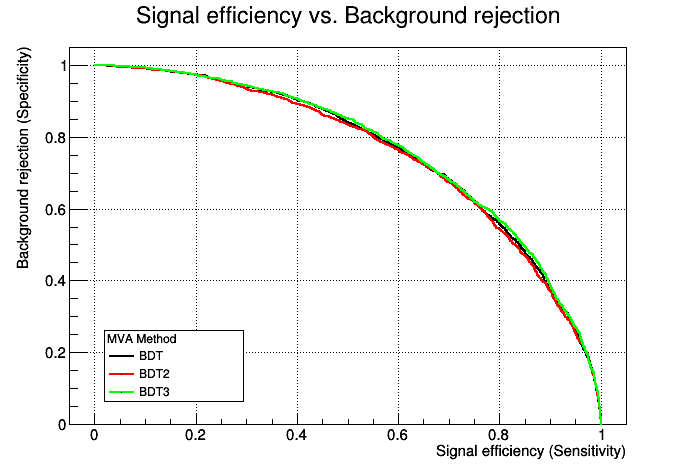

In [3]:
# We can now compare with our first BDT
cROC = factory.GetROCCurve(loader)
cROC.Draw()

In [4]:
# Closing the file where we have the methods trained
outputFile.Close()
factory.Delete()

## Follow-up

You can test various BDT configurations to understand how these algorithms work.

In another tutorial, we compare with other BDT and NN algorithms.

### Exploring the methods using the TMVAGui

TMVA comes with the TMVAGui, which helps understand how the algorithms behave. To run it, simply run
```
root -l -e 'TMVA::TMVAGui("TMVA-Classification-Higgs-BDT-Comparison.root")'
```
from your terminal.